### Nussinov

In [5]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

In [1]:
def initialize(string_rna):
    n = len(string_rna)
    matrix = np.zeros(shape=(len(string_rna), len(string_rna)))
    #parents = np.nan(shape = (len(string_rna), len(string_rna)))
    '''matrix = [[None]*n for i in range(n)]
    matrix = np.array(matrix)
    matrix.reshape((9,9))
    for i in range(n):
        matrix[i][i] = 0
        if i > 0:
            matrix[i][i-1] = 0'''
    return matrix

In [2]:
def compliment(letter_a, letter_b):
    if (letter_a == 'A' and letter_b == 'U') or (letter_a == 'U' and letter_b == 'A'):
        return 1
    if (letter_a == 'C' and letter_b == 'G') or (letter_a == 'G' and letter_b == 'C'): 
        return 1
    else:
        return 0

In [3]:
def sum_max(i, j, matrix):
    res = 0
    k_0 = None
    for k in range(i+1, j):
        summ = matrix[i][k]+matrix[k+1][j]
        if summ > res:
            res = summ
            k_0 = k
    return res, k_0

In [26]:
def test(string_rna):
    n = len(string_rna)
    matrix = initialize(string_rna)
    for t in range(1, n):
        for j in range(t+2, n):
            i = j - t - 2
            matrix[i][j] = 1
    return matrix
    
string_rna = 'GGACC'
matrix = test(string_rna)
matrix

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [28]:
def nussinov(string_rna, min_loop):
    n = len(string_rna)
    #print(n)
    matrix = initialize(string_rna)
    for t in range(1, n):
        for j in range(t+min_loop, n):
            i = j - t - min_loop
            res, k_0 = sum_max(i, j, matrix)
            matrix[i][j] = max(matrix[i][j-1],
                                matrix[i+1][j],
                                matrix[i+1][j-1] + compliment(string_rna[i], string_rna[j]),
                                res)
    return 0, n-1, matrix

In [14]:
def neighborhood(i, j, matrix):
    if matrix[i][j-1] == None:
        return False
    if matrix[i+1][j] == None:
        return False
    if matrix[i+1][j-1] == None:
        return False
    else:
        return True

In [15]:
def return_way(matrix, string_rna, pair):
    n = len(string_rna)
    i = 0
    j = n-1
    ans_list = []
    while neighborhood(i, j, matrix):
        if matrix[i][j] == matrix[i+1][j-1] + compliment(string_rna[i], string_rna[j]):
            ans_list.append(string_rna[i]+string_rna[j])
            i, j = i+1, j-1
            continue
        if matrix[i][j] == matrix[i+1][j]:
            ans_list.append(string_rna[i])
            i = i+1
            continue
        if matrix[i][j] == matrix[i][j-1]:
            ans_list.append(string_rna[j])
            i = i+1
            continue
        #res, k_0 = sum_max(i, j, matrix)
        #if matrix[i][j] == res:
        #    ans_list          
    return ans_list

In [16]:
def traceback(matrix,string_rna,i,j,pair):
    if i<j:
        if matrix[i,j] == matrix[i+1,j]:
            traceback(matrix,string_rna,i+1,j,pair)
        elif matrix[i,j] == matrix[i,j-1]:
            traceback(matrix, string_rna, i, j-1, pair)
        elif matrix[i,j] == matrix[i+1,j-1]+compliment(string_rna[i],string_rna[j]):
            pair.append([i,j,str(string_rna[i]),str(string_rna[j])])
            traceback(matrix, string_rna, i+1, j-1, pair)
        else:
            for k in range(i+1,j):
                if matrix[i,j] == matrix[i,k]+matrix[k+1,j]:
                    traceback(matrix, string_rna, i, k, pair)
                    traceback(matrix, string_rna, k+1, j, pair)
                    break
    return pair

In [17]:
def analyze_traceback(ans, string_rna):
    n = len(string_rna)
    res = ['-']*n
    for x in ans:
        res[x[0]] = '('
        res[x[1]] = ')'
    print(''.join(res))

In [36]:
string_rna = 'GGGAAAUCC'
i, j, matrix = nussinov(string_rna, 2)
ans = traceback(matrix, string_rna, i, j, [])
print(matrix)
print(ans)
analyze_traceback(ans, string_rna)

[[0. 0. 0. 0. 0. 0. 1. 2. 3.]
 [0. 0. 0. 0. 0. 0. 1. 2. 3.]
 [0. 0. 0. 0. 0. 0. 1. 2. 2.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1, 8, 'G', 'C'], [2, 7, 'G', 'C'], [3, 6, 'A', 'U']]
-(((--)))


In [38]:
string_rna = 'GGACC'
i, j, matrix = nussinov(string_rna, 3)
ans = traceback(matrix, string_rna, i, j, [])
#print(matrix)
#print(ans)
analyze_traceback(ans, string_rna)

(---)


In [42]:
string_rna = 'AAACAUGAGGAUUACCCAUGU'
i, j, matrix = nussinov(string_rna, 4)
ans = traceback(matrix, string_rna, i, j, [])
#print(matrix)
#print(ans)
analyze_traceback(ans, string_rna)

--(((((-((----)))))))


## <span style="color:white">Exercise 1</span>

In [49]:
f = open('seq_al.txt', 'r')
data = []
for line in f:
    data.append(list(line.replace('\n', '')))
data = np.array(data)
data

array([['A', 'C', 'G', 'A', 'A', 'A', 'G', 'U'],
       ['U', 'A', 'G', 'U', 'A', 'A', 'U', 'A'],
       ['A', 'G', 'G', 'U', 'G', 'A', 'C', 'U'],
       ['C', 'G', 'G', 'C', 'A', 'A', 'U', 'G'],
       ['G', 'U', 'G', 'G', 'G', 'A', 'A', 'C']], dtype='<U1')

In [50]:
def M_i_j(col1, col2, all_pairs):
    M_i_j = 0
    col1 = list(col1)
    col2 = list(col2)
    for pair in all_pairs:
        x, y = pair[0], pair[1]
        f_x = col1.count(x)/len(col1)
        #print(f_x)
        f_y = col2.count(y)/len(col2)
        res = 0
        for i in range(len(col1)):
            if (col1[i] == x and col2[i] == y):
                res += 1
        f_x_y = res/len(col1)
        if f_x_y != 0:
            res_2 = f_x_y/(f_x*f_y)
            #print(res_2)
            M_i_j += f_x_y*np.log2(res_2)
        else:
            M_i_j += 0
    return round(M_i_j, 2)

In [51]:
def make_simm(M):
    for j in range(M.shape[0]):
        for i in range(j):
            M[j][i] = M[i][j]
    return M

In [52]:
def making_M(data, all_pairs):
    size = data.shape[1]
    M = np.zeros((size, size))
    for i in range(size-1):
        for j in range(i+1, size):
            col1 = data[:, i]
            col2 = data[:, j]
            M[i][j] = M_i_j(col1, col2, all_pairs)
    M = make_simm(M)
    return M
            

In [53]:
a = ['A', 'C', 'G', 'U']
all_pairs = it.product(a,a)
all_pairs = list(all_pairs)
print(*all_pairs)

('A', 'A') ('A', 'C') ('A', 'G') ('A', 'U') ('C', 'A') ('C', 'C') ('C', 'G') ('C', 'U') ('G', 'A') ('G', 'C') ('G', 'G') ('G', 'U') ('U', 'A') ('U', 'C') ('U', 'G') ('U', 'U')


In [54]:
pairs = it.permutations(a, 2)
pairs = list(pairs)
print(*pairs)

('A', 'C') ('A', 'G') ('A', 'U') ('C', 'A') ('C', 'G') ('C', 'U') ('G', 'A') ('G', 'C') ('G', 'U') ('U', 'A') ('U', 'C') ('U', 'G')


In [55]:
M = making_M(data, pairs)
print(M)

[[0.   1.52 0.   0.06 0.36 0.   1.26 1.92]
 [1.52 0.   0.   1.52 0.36 0.   1.52 0.79]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 1.52 0.   0.   0.16 0.   1.46 1.46]
 [0.36 0.36 0.   0.16 0.   0.   0.97 0.42]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.26 1.52 0.   1.46 0.97 0.   0.   1.52]
 [1.92 0.79 0.   1.46 0.42 0.   1.52 0.  ]]


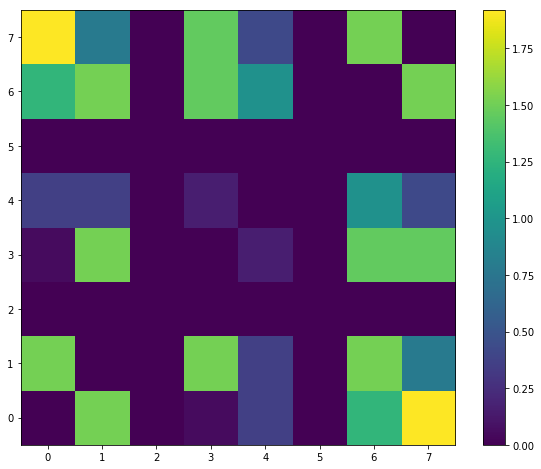

In [57]:
f = plt.figure(figsize = (10, 8))
plt.imshow(M, origin = True)
plt.colorbar()
plt.show()

#### <span style="color:white">Analyzing bacteria with tRNAs have the same length</span> 

In [58]:
from Bio import SeqIO

In [59]:
# Reading
bac_records = []
records_organism = list(SeqIO.parse('bacterial-trnas.fa', 'fasta'))
bac_records.append(records_organism)
seq_rna_rec = []
for x in bac_records[0]:
    seq_rna_rec.append(str(x.seq))

In [60]:
# Analyzing
len_seq = []

for seq in seq_rna_rec:
    len_seq.append(len(seq))

uniq = np.unique(len_seq)

res = 0
length = None
for m in uniq:
    cnt = len_seq.count(m)
    if cnt > res:
        res = cnt
        length = m
print(res, length)

6685 76


* Возьмём тРНК длиной 76

In [61]:
# Data appending
data_bac = []
for seq in seq_rna_rec:
    if len(seq) == 76:
        data_bac.append(list(seq))
data_bac = np.array(data_bac)
data_bac

array([['G', 'G', 'G', ..., 'C', 'C', 'A'],
       ['G', 'G', 'G', ..., 'C', 'C', 'A'],
       ['G', 'G', 'G', ..., 'C', 'C', 'A'],
       ...,
       ['G', 'C', 'C', ..., 'C', 'C', 'A'],
       ['A', 'G', 'G', ..., 'C', 'C', 'A'],
       ['G', 'G', 'G', ..., 'C', 'C', 'A']], dtype='<U1')

In [62]:
M_bac = making_M(data_bac, pairs)
print(M_bac)

[[ 0.    0.02 -0.02 ... -0.    0.    0.  ]
 [ 0.02  0.   -0.18 ... -0.    0.01  0.  ]
 [-0.02 -0.18  0.   ... -0.    0.   -0.  ]
 ...
 [-0.   -0.   -0.   ...  0.    0.    0.  ]
 [ 0.    0.01  0.   ...  0.    0.   -0.  ]
 [ 0.    0.   -0.   ...  0.   -0.    0.  ]]


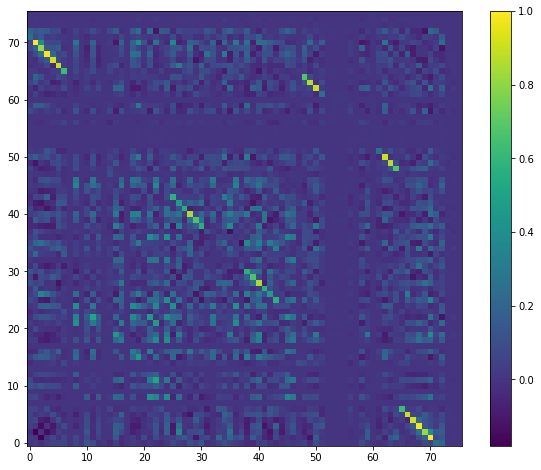

In [63]:
f = plt.figure(figsize = (10, 8))
plt.imshow(M_bac, origin = True)
plt.colorbar()
plt.show()

* Как можно увидеть у нас есть некоторые "теплые"зоны, которые можно интерпретировать как 'родственные' зоны связи у взятых тРНК бактерий